In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [11]:
df = df.set_index('date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [16]:
# Clean data
lower_th = df['value'].quantile(0.025)
upper_th = df['value'].quantile(0.975)
print(f"Supperieur a 2.5%: {lower_th}")
print(f"Inferieur a 97.5%: {upper_th}")

Supperieur a 2.5%: 17876.4
Inferieur a 97.5%: 177613.075


In [17]:
df_inf = df[df['value'] < lower_th]

In [18]:
df_inf.count()

value    33
dtype: int64

In [19]:
df_sup = df[df['value'] > upper_th]
df_sup.count()

value    33
dtype: int64

In [20]:
df_c = df[(df['value'] > lower_th) & (df['value'] < upper_th)]
df_c

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [31]:
df_c

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


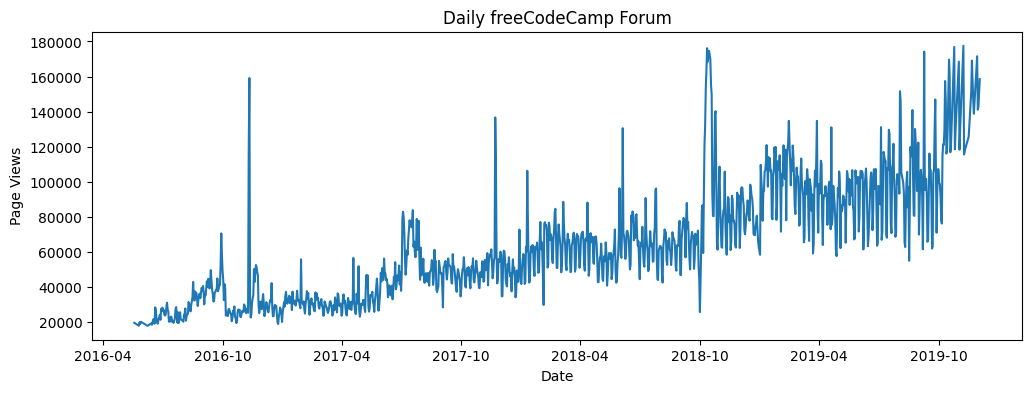

In [35]:
import matplotlib.dates as mdates
# def draw_line_plot():
# Draw line plot
df_c.index = pd.to_datetime(df_c.index)
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(12, 4))
ax.set_title("Daily freeCodeCamp Forum")
ax.set_ylabel("Page Views")
ax.set_xlabel('Date')

sns.lineplot(data=df_c, x='date', y='value', ax=ax)
# Save image and return fig (don't change this part)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()
# fig.savefig('line_plot.png')
# return fig

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [ ]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig